# fiveThirtyEight

What's the impact of Five Thirty Eight on the election?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Rules of the game:**

* There's a split of voters between 2 candidates: $x$ for the right, $1-x$ for the left.
* Righties vote no matter what. Among the lefties, $a$ voters vote no matter what, $(1-a)$ hesitate.
* In one universe, where 538 doesn't exist, these hesitant voters eventually vote with the turnover of 50%
* In another universe, the The hesitant (lazy) voters read 538 amd nay be swayed by its prediction. But the rules are weird:
    * If their candidate is predicted to have a landslide, they don't vote (why would they?)
    * If the opponent is predicted to win just barely (say, get 60% of votes), they get energized and vote, all of them
    * If their candidate is predicted to loose in a landslide, they also don't vote (despare)
    * Let's assume that "a landslide" = 75%, and there's a linear transition from no vote at 25%, to full vote at 50%, no vote again at 75%.

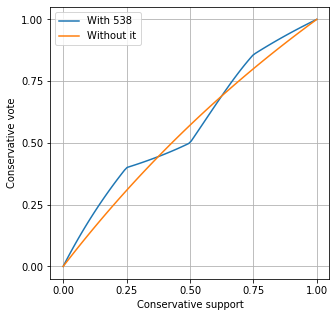

In [41]:
x = np.linspace(0, 1, 100)
a = 0.5
pconst = 0.5 # Without 538, that many lazy voters vote

p = np.maximum(0, 1-np.abs(x-0.5)/0.25)
v1 = x
v2 = (1-x)*a  + (1-x)*(1-a)*p
v3 = (1-x)*a  + (1-x)*(1-a)*pconst

plt.figure(figsize=(5,5))
plt.plot(x, v1/(v1+v2), label="With 538");
plt.plot(x, v1/(v1+v3), label="Without it");
plt.xticks([0, 0.25, 0.5, 0.75, 1]);
plt.yticks([0, 0.25, 0.5, 0.75, 1]);
plt.grid();
plt.xlabel('Conservative support');
plt.ylabel('Conservative vote')
plt.legend();